<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [2]:
# Now Take All the ata into a list
data_dir='BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [3]:
trainindata[0]["cjdata"]["image"]

<HDF5 dataset "image": shape (512, 512), type "<i2">

In [4]:
import keras
import random
random.shuffle(trainindata)

In [5]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [6]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512)
testx=np.array(testx).reshape(-1,512,512)
trainy=np.array(trainy)
testy=np.array(testy)

In [53]:
# print(testy)

In [55]:
# print(trainx)

In [7]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2436, 512, 512)
(613, 512, 512)
(2436,)
(613,)


In [23]:
# print(testx)

In [8]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Conv1D,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU

In [12]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape = (512,512)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='softmax'))

In [30]:
# model.summary()

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
r=model.fit(trainx,
          trainy,
          epochs=50,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/50
77/77 [==============================] - 10s 132ms/step - loss: 1.0033 - accuracy: 0.6178 - val_loss: 0.6749 - val_accuracy: 0.7732
Epoch 2/50
77/77 [==============================] - 11s 148ms/step - loss: 0.6800 - accuracy: 0.7241 - val_loss: 0.5524 - val_accuracy: 0.7912
Epoch 3/50
77/77 [==============================] - 11s 145ms/step - loss: 0.5942 - accuracy: 0.7677 - val_loss: 0.5111 - val_accuracy: 0.8303
Epoch 4/50
77/77 [==============================] - 11s 144ms/step - loss: 0.5451 - accuracy: 0.7927 - val_loss: 0.4550 - val_accuracy: 0.8352
Epoch 5/50
77/77 [==============================] - 11s 145ms/step - loss: 0.5202 - accuracy: 0.7919 - val_loss: 0.4464 - val_accuracy: 0.8352
Epoch 6/50
77/77 [==============================] - 11s 145ms/step - loss: 0.4608 - accuracy: 0.8239 - val_loss: 0.4200 - val_accuracy: 0.8320
Epoch 7/50
77/77 [==============================] - 11s 145ms/step - loss: 0.4523 - accuracy: 0.8309 - val_loss: 0.4399 - val_accuracy: 0.8303

In [17]:
# let's extract features from convolutional network for XBG
feature_extractor = model.predict(trainx)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

77/77 [==============================] - 3s 36ms/step


In [19]:
# perform same operation on test dataset
feature_extractor_test = model.predict(testx)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

20/20 [==============================] - 1s 35ms/step


In [28]:
len(X_train_features)

2436

In [21]:
# defining XGBoost Classifier model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_features, trainy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [29]:
prediction = model.predict(X_test_features)

In [32]:
# prediction

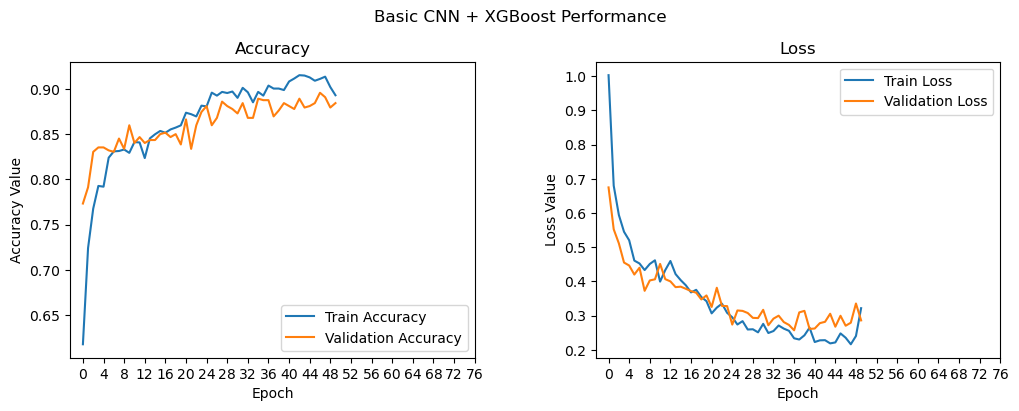

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN + XGBoost Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
plt.savefig('CNN + XGBoost Performance.png')

In [33]:
# pred=model.predict(testx)
# Y_pred = np.argmax(pred, 1)

In [34]:
Y_pred = prediction

In [35]:
testy.shape

(613,)

In [89]:
# Y_pred

In [91]:
# testy

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[109  24   4]
 [ 28 250   6]
 [  3   1 188]]


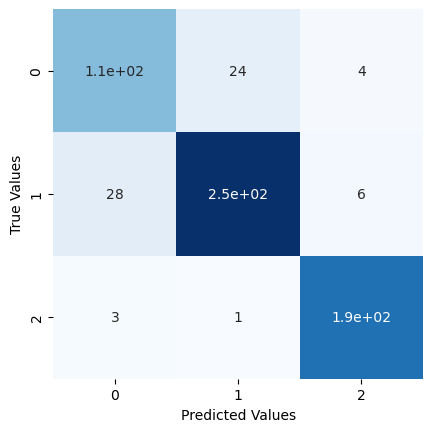

In [37]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [38]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.78      0.80      0.79       137
      Glioma       0.91      0.88      0.89       284
   Pituitary       0.95      0.98      0.96       192

    accuracy                           0.89       613
   macro avg       0.88      0.89      0.88       613
weighted avg       0.89      0.89      0.89       613



In [ ]:
print(trainy)

[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

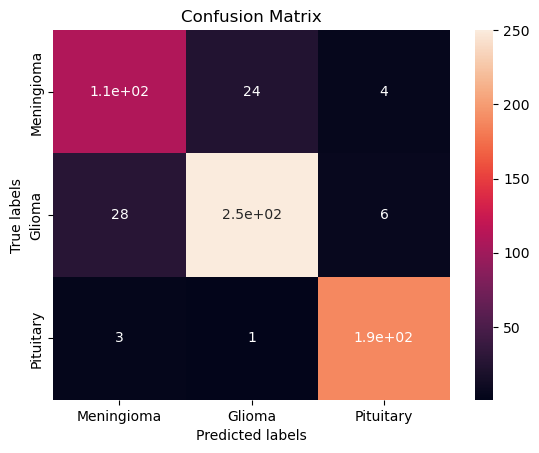

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])

Confusion Matrix :
[[109  24   4]
 [ 28 250   6]
 [  3   1 188]]
Accuracy Score : 0.8923327895595432
Report : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       137
           1       0.91      0.88      0.89       284
           2       0.95      0.98      0.96       192

    accuracy                           0.89       613
   macro avg       0.88      0.89      0.88       613
weighted avg       0.89      0.89      0.89       613



<AxesSubplot: >

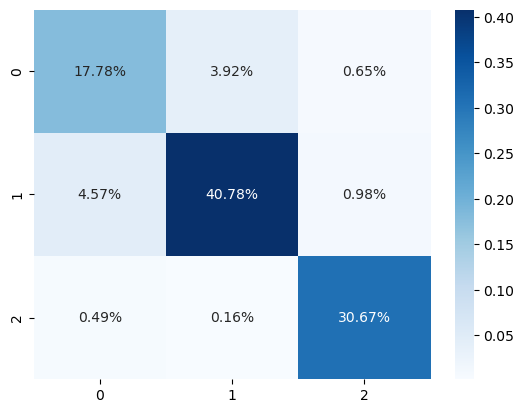

In [40]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(testy,Y_pred)) 
print('Report : ')
print(classification_report(testy,Y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [41]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.9734696654790183

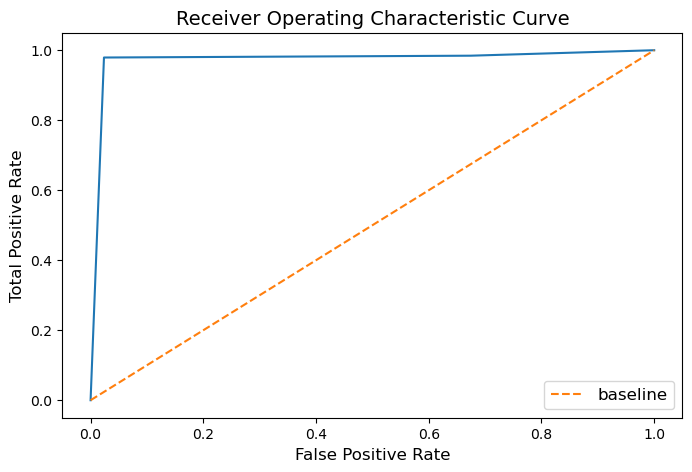

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [1]:
# model.save('my_model_xgb.h5')

In [100]:
# model.save_weights('/content/drive/My Drive/Brain_MRI2/my_weight')